<a href="https://colab.research.google.com/github/Pramodkumaryalagala12/LDA/blob/main/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Loading and Scaling Data
Data Mean after Scaling: -0.0
Data Std Dev after Scaling: 1.0

Step 2: Executing LDA Transformation
Shape of original data: (150, 4)
Shape after LDA: (150, 2)
LDA Explained Variance Ratio: [0.9912 0.0088]

Step 3: Running PCA for Comparison
PCA Explained Variance Ratio: [0.7296 0.2285]

Step 4: Visualizing Results


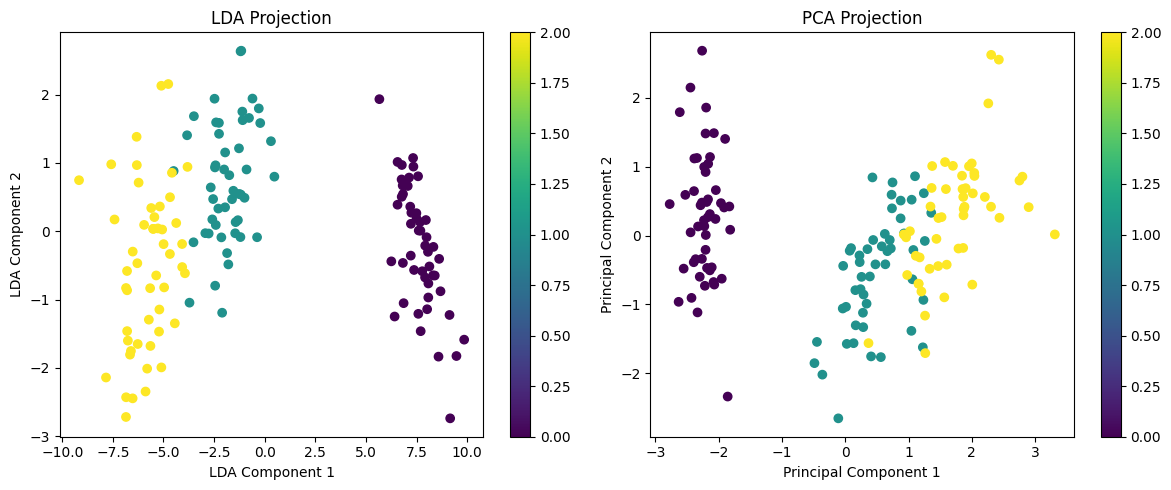


Step 5: Analyzing the Results
LDA vs PCA:
- LDA focuses on enhancing class separation.
- PCA prioritizes variance in the data.

Distance Between Classes:
LDA: 9.4797
PCA: 2.8476


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import seaborn as sns

def lab1_lda_analysis():
    # Step 1: Loading and Scaling the Data
    print("Step 1: Loading and Scaling Data")
    # Load the Iris dataset
    iris = load_iris()
    X, y = iris.data, iris.target
    feature_names = iris.feature_names

    # Scale the data to have mean 0 and standard deviation 1
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print("Data Mean after Scaling:", X_scaled.mean().round(6))
    print("Data Std Dev after Scaling:", X_scaled.std().round(6))

    # Step 2: Conduct LDA Transformation
    print("\nStep 2: Executing LDA Transformation")
    lda = LinearDiscriminantAnalysis(n_components=2)
    X_lda = lda.fit_transform(X_scaled, y)
    print("Shape of original data:", X.shape)
    print("Shape after LDA:", X_lda.shape)
    print("LDA Explained Variance Ratio:", lda.explained_variance_ratio_.round(4))

    # Step 3: Run PCA for Comparative Analysis
    print("\nStep 3: Running PCA for Comparison")
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_.round(4))

    # Step 4: Visualization of Results
    print("\nStep 4: Visualizing Results")
    plt.figure(figsize=(12, 5))

    # LDA Visualization
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1],
                          c=y, cmap='viridis')
    plt.title('LDA Projection')
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    plt.colorbar(scatter)

    # PCA Visualization
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                          c=y, cmap='viridis')
    plt.title('PCA Projection')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(scatter)

    plt.tight_layout()
    plt.show()

    # Step 5: Result Analysis
    print("\nStep 5: Analyzing the Results")
    print("LDA vs PCA:")
    print("- LDA focuses on enhancing class separation.")
    print("- PCA prioritizes variance in the data.")

    # Compute distances between class means for each method
    class_means_lda = [np.mean(X_lda[y == i], axis=0) for i in range(3)]
    class_means_pca = [np.mean(X_pca[y == i], axis=0) for i in range(3)]

    print("\nDistance Between Classes:")
    print("LDA:", np.linalg.norm(class_means_lda[0] - class_means_lda[1]).round(4))
    print("PCA:", np.linalg.norm(class_means_pca[0] - class_means_pca[1]).round(4))

if __name__ == "__main__":
    lab1_lda_analysis()
